In [1]:
import os
import time
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.autograd as autograd

from utils.multiprocessing_env import SubprocVecEnv
from utils.minipacman import MiniPacman
from utils.environment_model import *
from utils.actor_critic import ActorCritic, RolloutStorage
from utils.imagination_augmented_agent import RolloutEncoder, ImaginationCore, I2A

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
mode = "regular"
env = MiniPacman(mode, 1000)
batch_size = 1
num_actions = env.action_space.n
state_shape = env.observation_space.shape

In [3]:
env_path = os.path.join("training", "environment_model", "env_model")
env_checkpoint = torch.load(env_path, map_location=DEVICE)

env_model = EnvModel(state_shape, num_actions, num_pixels, len(mode_rewards[mode]))
env_model.load_state_dict(env_checkpoint)
env_model.to(DEVICE)

print("loading env_model successfully")

loading env_model successfully


In [4]:
a2c_path = os.path.join("training", "actor_critic", "actor_critic_checkpoint")
a2c_checkpoint = torch.load(a2c_path, map_location=DEVICE)

actor_critic = ActorCritic(state_shape, num_actions)
actor_critic.load_state_dict(a2c_checkpoint['actor_critic_state_dict'])
actor_critic.to(DEVICE)
a2c_all_rewards = a2c_checkpoint['all_rewards']

print("loading a2c successfully")

loading a2c successfully


In [5]:
i2a_r1_path = os.path.join("training", "imagination_augmented_agents_rollout_1", "I2A_checkpoint")
i2a_r1_checkpoint = torch.load(i2a_r1_path, map_location=DEVICE)

i2a_r1_imagination = i2a_r1_checkpoint['imagination']

i2a_r1 = I2A(state_shape, num_actions, len(mode_rewards[mode]), 256, i2a_r1_imagination, full_rollout=True)
i2a_r1.load_state_dict(i2a_r1_checkpoint['actor_critic_state_dict'])
i2a_r1.to(DEVICE)
i2a_r1_all_rewards = i2a_r1_checkpoint['all_rewards']

print("loading i2a_r1 successfully")

loading i2a_r1 successfully


In [6]:
i2a_r5_path = os.path.join("training", "imagination_augmented_agents_rollout_5", "I2A_checkpoint")
i2a_r5_checkpoint = torch.load(i2a_r5_path, map_location=DEVICE)

i2a_r5_imagination = i2a_r5_checkpoint['imagination']

i2a_r5 = I2A(state_shape, num_actions, len(mode_rewards[mode]), 256, i2a_r5_imagination, full_rollout=True)
i2a_r5.load_state_dict(i2a_r5_checkpoint['actor_critic_state_dict'])
i2a_r5.to(DEVICE)
i2a_r5_all_rewards = i2a_r5_checkpoint['all_rewards']

print("loading i2a_r5 successfully")

loading i2a_r5 successfully


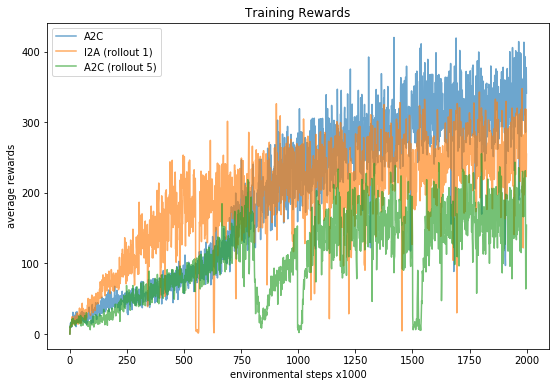

In [16]:
plt.figure(figsize=(9, 6))
plt.title("Training Rewards")
plt.plot(a2c_all_rewards[:2000], alpha=0.65, label="A2C")
plt.plot(i2a_r1_all_rewards[:2000], alpha=0.65, label="I2A (rollout 1)")
plt.plot(i2a_r5_all_rewards[:2000], alpha=0.65, label="A2C (rollout 5)")
plt.xlabel("environmental steps x1000")
plt.ylabel("average rewards")
plt.legend()
fig = plt.gcf()
fig.savefig(os.path.join("results", "training_rewards.pdf"), bbox_inches="tight")
plt.show()